In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features. Split the data in to train and test sets.

In [2]:
data = pd.read_csv('letterCG.bin')

In [3]:
data.head()

,Class x-box y-box width high onpix x-bar y-bar x2bar y2bar xybar x2ybr xy2br x-ege xegvy y-ege yegvx
0,C 4 10 5 8 2 5 7 7 10 7 6 13 1 8 4 9
1,C 3 5 4 4 2 4 8 5 7 12 9 11 1 10 2 7
2,G 5 10 6 7 3 8 7 8 8 6 7 9 2 7 5 10
3,C 5 9 6 7 4 3 8 6 7 12 10 13 1 9 3 7
4,G 4 8 5 6 3 6 6 7 6 10 7 12 2 9 4 9


In [4]:
data = pd.read_csv('letterCG.bin', sep=' ')

In [5]:
data.head()

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        1509 non-null   object 
 1   x-box        1509 non-null   int64  
 2   y-box        1509 non-null   int64  
 3   width        1509 non-null   int64  
 4   high         1509 non-null   int64  
 5   Unnamed: 5   1509 non-null   int64  
 6   onpix        1509 non-null   int64  
 7   x-bar        1509 non-null   int64  
 8   y-bar        1509 non-null   int64  
 9   x2bar        1509 non-null   int64  
 10  y2bar        1509 non-null   int64  
 11  xybar        1509 non-null   int64  
 12  x2ybr        1509 non-null   int64  
 13  xy2br        1509 non-null   int64  
 14  x-ege        1509 non-null   int64  
 15  xegvy        1509 non-null   int64  
 16  y-ege        1509 non-null   int64  
 17  yegvx        0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
dtypes: flo

In [7]:
data.isna().sum()

Class             0
x-box             0
y-box             0
width             0
high              0
Unnamed: 5        0
onpix             0
x-bar             0
y-bar             0
x2bar             0
y2bar             0
xybar             0
x2ybr             0
xy2br             0
x-ege             0
xegvy             0
y-ege             0
yegvx          1509
Unnamed: 18    1509
dtype: int64

In [8]:
data.drop(['yegvx', 'Unnamed: 18'], axis=1, inplace=True)

In [9]:
data['Unnamed: 5'] = data.rename(columns={'Unnamed: 5' : 'width'}, inplace=True)

In [10]:
data.drop(['Unnamed: 5'], axis=1, inplace=True)

In [11]:
data.head()

,Class,x-box,y-box,width,high,width,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


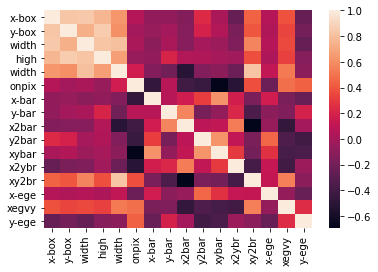

In [12]:
sns.heatmap(data.corr());

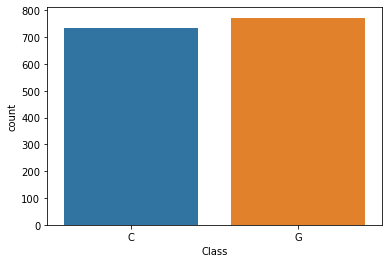

In [13]:
sns.countplot(data['Class']);

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
data['Class'] = le.fit_transform(data['Class'])

In [16]:
data.head()

,Class,x-box,y-box,width,high,width,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,0,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,1,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,0,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,1,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [19]:
X

array([[ 4, 10,  5, ...,  8,  4,  9],
       [ 3,  5,  4, ..., 10,  2,  7],
       [ 5, 10,  6, ...,  7,  5, 10],
       ...,
       [ 5,  9,  6, ...,  9,  5,  9],
       [ 6, 11,  7, ...,  9,  6,  6],
       [ 5, 10,  5, ..., 11,  3,  7]], dtype=int64)

In [20]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, test_size=0.25)

## 2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. Use decision tree classifier as the base classifier.

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
classifier = DecisionTreeClassifier(max_depth=1)

In [23]:
ada_boost = AdaBoostClassifier(base_estimator=classifier, n_estimators=400, learning_rate=1)

In [24]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=400)

In [25]:
pred_values = ada_boost.predict(X_test)

In [26]:
print("Accuracy Score : ", accuracy_score(y_test, pred_values))

Accuracy Score :  0.9735449735449735


## 3. Repeat step2 with max_depth set as 2.

In [27]:
classifier = DecisionTreeClassifier(max_depth=2)

In [28]:
ada_boost = AdaBoostClassifier(base_estimator=classifier,n_estimators=400,learning_rate=1)

In [29]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=400)

In [30]:
pred_values2 = ada_boost.predict(X_test)

In [31]:
print("Accuracy Score : ", accuracy_score(y_test, pred_values2))

Accuracy Score :  0.9894179894179894
